<a href="https://colab.research.google.com/github/Tousif-khan/Legal-document-retrieval-/blob/master/basic_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Setup Notebook

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

# Reading preprocessed data

In [137]:
import os
os.chdir('/content/drive/My Drive/COLIEE Retrieval /COLIEE Dry Run Data /preprocessed_data/')
import pandas as pd
df_query_list = pd.read_pickle('cleaned_ground_truth.pkl')
df_query_list.head
df_civil_code_list = pd.read_pickle('cleaned_civil_code.pkl')
df_civil_code_list.head
dataset_query_tokens = df_query_list['Query_tokens']
dataset_query_lemmas = df_query_list['Query_lemma']
dataset_article_tokens = df_civil_code_list['Article_description_tokens']
dataset_article_lemmas = df_civil_code_list['Article_description_lemmas']

In [138]:
import re
def change_hyphen(article_number):
  return re.sub('_','-',article_number)
def remmove_space(article_number):
  return re.sub(' ','',article_number)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(change_hyphen)
df_civil_code_list['Article_number']= df_civil_code_list['Article_number'].apply(remmove_space)

In [73]:
df_civil_code_list

,Article_number,Referenced_article_num,Article_description,Article_titles,Article_description_tokens,Article_description_lemmas,Article_description_pos,Article_title_tokens,Article_title_lemma,Article_title_pos
1,1,set(),(Fundamental Principles) Article_1 (1) Privat...,(Fundamental Principles),"[fundamental, principles, article_1, 1, privat...","['fundamental', 'principle', 'article_1', '1',...","['ADJ', 'NOUN', 'PROPN', 'X', 'ADJ', 'NOUN', '...","[fundamental, principles]","['fundamental', 'principle']","['ADJ', 'NOUN']"
2,2,set(),(Standards for Construction) Article_2 This C...,(Standards for Construction),"[standards, construction, article_2, code, mus...","['standard', 'construction', 'article_2', 'cod...","['NOUN', 'NOUN', 'ADV', 'NOUN', 'VERB', 'VERB'...","[standards, construction]","['standard', 'construction']","['NOUN', 'NOUN']"
3,3,set(),Article 3 (1) The enjoyment of private rights...,(Standards for Construction),"[article, 3, 1, enjoyment, private, rights, co...","['article', '3', '1', 'enjoyment', 'private', ...","['NOUN', 'NUM', 'X', 'NOUN', 'ADJ', 'NOUN', 'N...","[standards, construction]","['standard', 'construction']","['NOUN', 'NOUN']"
4,3-2,set(),Article 3-2 If the person making a juridical ...,(Standards for Construction),"[article, 3, 2, person, making, juridical, act...","['article', '3', '2', 'person', 'make', 'jurid...","['PROPN', 'NUM', 'NUM', 'NOUN', 'VERB', 'ADJ',...","[standards, construction]","['standard', 'construction']","['NOUN', 'NOUN']"
5,4,set(),(Age of Majority) Article_4 The age of majori...,(Age of Majority),"[age, majority, article_4, age, majority, 20, ...","['age', 'majority', 'article_4', 'age', 'major...","['NOUN', 'NOUN', 'VERB', 'NOUN', 'NOUN', 'NUM'...","[age, majority]","['age', 'majority']","['NOUN', 'NOUN']"
...,...,...,...,...,...,...,...,...,...,...
772,721,set(),(Fetus' Capacity to Hold Rights Regarding Clai...,(Fetus' Capacity to Hold Rights Regarding Clai...,"[fetus, capacity, hold, rights, regarding, cla...","['fetus', 'capacity', 'hold', 'right', 'regard...","['PROPN', 'NOUN', 'VERB', 'NOUN', 'VERB', 'NOU...","[fetus, capacity, hold, rights, regarding, cla...","['fetus', 'capacity', 'hold', 'right', 'regard...","['PROPN', 'NOUN', 'VERB', 'NOUN', 'VERB', 'NOU..."
773,722,set(),"(Method of Compensation for Loss or Damage, De...","(Method of Compensation for Loss or Damage, De...","[method, compensation, loss, damage, deduction...","['method', 'compensation', 'loss', 'damage', '...","['NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'...","[method, compensation, loss, damage, deduction...","['method', 'compensation', 'loss', 'damage', '...","['NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADJ'..."
774,723,set(),(Recovery in Defamation) Article_723 The cour...,(Recovery in Defamation),"[recovery, defamation, article_723, court, may...","['recovery', 'defamation', 'article_723', 'cou...","['NOUN', 'NOUN', 'PROPN', 'NOUN', 'VERB', 'VER...","[recovery, defamation]","['recovery', 'defamation']","['NOUN', 'NOUN']"
775,724,set(),(Extinctive Prescription of Claim for Compensa...,(Extinctive Prescription of Claim for Compensa...,"[extinctive, prescription, claim, compensation...","['extinctive', 'prescription', 'claim', 'compe...","['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN'...","[extinctive, prescription, claim, compensation...","['extinctive', 'prescription', 'claim', 'compe...","['ADJ', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN'..."


In [59]:
df_query_list

,ID,Query,Article_numbers,Query_tokens,Query_lemma,Query_pos,Articles
0,H18-1-1,A special provision that releases warranty ca...,['572'],"[special, provision, releases, warranty, made,...","['special', 'provision', 'release', 'warranty'...","['ADJ', 'NOUN', 'NOUN', 'NOUN', 'VERB', 'NOUN'...",['(Special Agreement Disclaiming Warranty) Art...
1,H18-1-2,There is a limitation period on pursuance of ...,"['565', '566']","[limitation, period, pursuance, warranty, rest...","['limitation', 'period', 'pursuance', 'warrant...","['NOUN', 'NOUN', 'NOUN', 'NOUN', 'NOUN', 'ADP'...","[""(Seller's Warranty in Case of Non-Conformity..."
2,H18-1-3,"A compulsory auction is also a sale, so warra...",['568'],"[compulsory, auction, also, sale, warranty, im...","['compulsory', 'auction', 'also', 'sale', 'war...","['ADJ', 'NOUN', 'ADV', 'NOUN', 'NOUN', 'VERB',...",['(Warranty in Cases of Auctions) Article_568 ...
3,H18-2-1,In cases where a person plans to prevent crim...,['697'],"[cases, person, plans, prevent, crime, house, ...","['case', 'person', 'plan', 'prevent', 'crime',...","['NOUN', 'NOUN', 'VERB', 'VERB', 'NOUN', 'NOUN...",['(Benevolent Intervention in Another\'s Busin...
4,H18-2-2,In cases where an individual rescues another ...,['698'],"[cases, individual, rescues, another, person, ...","['case', 'individual', 'rescue', 'another', 'p...","['NOUN', 'NOUN', 'VERB', 'DET', 'NOUN', 'VERB'...","[""(Urgent Benevolent Intervention in Another's..."
...,...,...,...,...,...,...,...
691,H28-27-4,A partnership shall be dissolved on the succe...,"['679', '681']","[partnership, shall, dissolved, successful, co...","['partnership', 'shall', 'dissolve', 'successf...","['NOUN', 'VERB', 'VERB', 'ADJ', 'NOUN', 'NOUN'...",['Article 679 Beyond the cases referred to in...
692,H28-28-1,A person who has tendered anything as perform...,['705'],"[person, tendered, anything, performance, obli...","['person', 'tender', 'anything', 'performance'...","['NOUN', 'VERB', 'PRON', 'NOUN', 'NOUN', 'VERB...",['(Performance Knowing of Absence of Obligatio...
693,H28-35-1,Both superficies and rights to lease land can...,['369'],"[superficies, rights, lease, land, not, subjec...","['superficie', 'right', 'lease', 'land', 'not'...","['NOUN', 'NOUN', 'VERB', 'NOUN', 'PART', 'ADJ'...","[""(Content of Mortgages) Article_369 (1) A mo..."
694,H28-35-2,An owner of the land shall not assume an obli...,['606'],"[owner, land, shall, not, assume, obligation, ...","['owner', 'land', 'shall', 'not', 'assume', 'o...","['NOUN', 'NOUN', 'VERB', 'PART', 'VERB', 'NOUN...",['(Repairs by Lessor) Article_606 (1) A lesso...


# Create article and query dataset

In [139]:
#article corpus
dataset_article_lemmas.iloc[0]
import ast
lemma_articles = []
for i in range(len(dataset_article_lemmas)):
  line = []
  line = ast.literal_eval(dataset_article_lemmas.iloc[i])
  lemma_articles.append(line)

In [ ]:
lemma_articles[0]

In [140]:
#query corpus and ground truth
query_list = []
for line in range(len(dataset_query_lemmas)):
  q = []
  q = ast.literal_eval(dataset_query_lemmas.iloc[line])
  query_list.append(q)
ground_truth = []
for line in range(len(df_query_list)):
  l=[]
  l=ast.literal_eval(df_query_list['Article_numbers'].iloc[line])
  ground_truth.append(l)


In [52]:
#len(query_list)
len(ground_truth[1])
int(ground_truth[1][0])
#for i
amounts = [0,0,0,0,0,0,0]
for i in range(len(ground_truth)):
  amounts[len(ground_truth[i])]+=1
print(amounts)

[0, 538, 122, 27, 6, 2, 1]


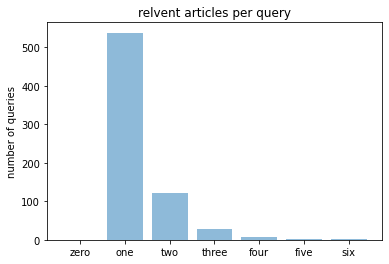

In [53]:
import matplotlib.pyplot as plt
import numpy as np
relevent_articles = ('zero','one','two','three','four','five','six')
y_pos = np.arange(len(relevent_articles))
plt.bar(y_pos, amounts, align='center', alpha=0.5)
plt.xticks(y_pos, relevent_articles)
plt.ylabel('number of queries')
plt.title('relvent articles per query')

plt.show()

In [126]:
l = df_civil_code_list['Article_number'].iloc[311]

#l=str(l)
print(l)
q = ast.literal_eval(df_query_list['Article_numbers'].iloc[244])
print(q)
if l in q:
  print("yes")
len(l)

362
['362', '364', '588']
yes


3

# Gensim parameters

In [143]:
from gensim import corpora
from nltk.tokenize import word_tokenize
import nltk 
nltk.download('punkt')
import pprint
from gensim import models
from gensim import similarities
#create dictionary
dictionary_articles = corpora.Dictionary(lemma_articles)
#create corpus
corpus_articles = [dictionary_articles.doc2bow(line) for line in lemma_articles]
#create model
tfidf_model = models.TfidfModel(corpus_articles, smartirs='ntc')
corpus_tfidf_model = tfidf_model[corpus_articles]
#index
index_tfidf_model = similarities.SparseMatrixSimilarity(corpus_tfidf_model, num_features=len(dictionary_articles))




[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [144]:
import pprint
print(dictionary_articles.token2id)
for i in range (5):
  print(corpus_articles[i])

{'1': 0, '2': 1, '3': 2, 'abuse': 3, 'article_1': 4, 'congruent': 5, 'do': 6, 'duty': 7, 'exercise': 8, 'faith': 9, 'fundamental': 10, 'good': 11, 'must': 12, 'not': 13, 'performance': 14, 'permit': 15, 'principle': 16, 'private': 17, 'public': 18, 'right': 19, 'welfare': 20, '  ': 21, 'article_2': 22, 'code': 23, 'construction': 24, 'construe': 25, 'dignity': 26, 'equality': 27, 'essential': 28, 'honor': 29, 'individual': 30, 'sex': 31, 'standard': 32, 'applicable': 33, 'article': 34, 'birth': 35, 'commence': 36, 'enjoy': 37, 'enjoyment': 38, 'foreign': 39, 'law': 40, 'national': 41, 'otherwise': 42, 'prohibit': 43, 'regulation': 44, 'treaty': 45, 'unless': 46, 'act': 47, 'capacity': 48, 'intention': 49, 'juridical': 50, 'make': 51, 'manifest': 52, 'mental': 53, 'person': 54, 'relevant': 55, 'void': 56, '20': 57, 'age': 58, 'article_4': 59, 'majority': 60, 'year': 61, "'s": 62, 'acquire': 63, 'apply': 64, 'article_5': 65, 'consent': 66, 'contravention': 67, 'dispose': 68, 'extent': 69

# Retreival Process

In [202]:
def retrieve(index, query_list,ground_truth, top_n,threshold):
    """
    This function searches the most similar texts to the query.
        :param index: gensim.similarities object
        :param query: a string
        :param top_n: how many variants it returns
        :param prints: if True returns the results, otherwise prints the results
        :returns: a list of tuples (matched_document_index, similarity_value)
    """
    total = 0
    tp = 0
    for i in range(len(query_list)):
      query_id = df_query_list['ID'].iloc[i]
      query_bow_vec = dictionary_articles.doc2bow(query_list[i])
      similarities = index[query_bow_vec]  # get similarities between the query and all index documents
      similarities = [(x, i) for i, x in enumerate(similarities)]
      similarities.sort(key=lambda elem: -elem[0])  # sorting by similarity_value in decreasing order
      rank = 1
      for score,doc_number in similarities[:top_n]:
        #if df_civil_code_list['Article_number'].iloc[doc_number]
        retrieved_article_number = df_civil_code_list['Article_number'].iloc[doc_number]
        if rank ==1:
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", ground_truth[i], sep=" ") 
          rank+=1
          total+=1
          if retrieved_article_number in ground_truth[i]:
            tp +=1
        elif score > threshold:
          print(query_id, "Q0", retrieved_article_number, rank, score, "ovgu", sep=" ") 
          if retrieved_article_number in ground_truth[i]:
            tp +=1
          rank+=1
          total+=1
          
    return total,tp
    

In [203]:
total_retrieved=0
total_relevent = 0
for i in range(len(ground_truth)):
  total_relevent += len(ground_truth[i])
print(total_relevent)
 #i in range(len(query_list)):
total_retrieved, true_positive = retrieve(index_tfidf_model,query_list,ground_truth,3,0.40)

  #print(result)

903
H18-1-1 Q0 572 1 0.51778907 ovgu ['572']
H18-1-2 Q0 565 1 0.23303653 ovgu ['565', '566']
H18-1-3 Q0 340 1 0.30043316 ovgu ['568']
H18-2-1 Q0 20 1 0.26400292 ovgu ['697']
H18-2-2 Q0 7 1 0.3298042 ovgu ['698']
H18-2-3 Q0 659 1 0.2554507 ovgu ['698']
H18-2-4 Q0 607-2 1 0.3855645 ovgu ['702']
H18-2-5 Q0 670-2 1 0.30952263 ovgu ['697']
H18-3-2 Q0 715 1 0.4929909 ovgu ['715']
H18-3-2 Q0 625 2 0.45677155 ovgu
H18-3-4 Q0 110 1 0.39117756 ovgu ['715']
H18-9-1 Q0 179 1 0.52049154 ovgu ['175', '265', '270', '280']
H18-9-1 Q0 175 2 0.5150639 ovgu
H18-9-2 Q0 179 1 0.34559196 ovgu ['295', '303', '388']
H18-9-3 Q0 179 1 0.5110723 ovgu ['329', '306', '330']
H18-15-1 Q0 330 1 0.34512705 ovgu ['398-20']
H18-15-2 Q0 398-19 1 0.47639263 ovgu ['398-3']
H18-15-2 Q0 398-12 2 0.47210813 ovgu
H18-15-2 Q0 398-16 3 0.4715767 ovgu
H18-15-3 Q0 398-2 1 0.30601564 ovgu ['398-2']
H18-15-4 Q0 398-16 1 0.45382047 ovgu ['398-7']
H18-15-4 Q0 398-12 2 0.44223818 ovgu
H18-15-4 Q0 398-19 3 0.43346262 ovgu
H18-15-5 Q0 39

# Evaluation

In [201]:
print(total_retrieved, true_positive)
false_positive = total_retrieved - true_positive
false_negative = total_relevent - true_positive
precision  = true_positive / (true_positive+false_positive)
recall = true_positive / (true_positive + false_negative)
f_score = (5* precision * recall) / (4 * (precision + recall))
print("Precion = ",precision,"Recall=", recall, "F2score = ",f_score, sep=" ")

1118 386
Precion =  0.34525939177101966 Recall= 0.4274640088593577 F2score =  0.23874319643740724


Precion =  0.45977011494252873 
Recall= 0.35437430786268 
F2score =  0.2501563477173233 if only 1 document is retrieved